In [1]:
import sys
sys.path.append('/home/avic/OOD_Orientation_Generalization')
import istarmap
from my_dataclasses import *
from tools import *
import matplotlib.pyplot as plt

In [2]:
def translate_axes(restriction_axes):
    if restriction_axes[1] == '1':
        return 'YZ'
    elif restriction_axes[4] == '1':
        return 'XY'
    else:
        return 'XZ'

In [3]:
exps_frame = pd.read_csv('/home/avic/OOD_Orientation_Generalization/exps1.csv', index_col=0)
# exps_frame = exps_frame[19:20]
exps_frame = exps_frame[(exps_frame.model_type == "ModelType.ResNet") & (exps_frame.unrestricted_axis == 0) & (exps_frame.training_category == 'plane') & (~exps_frame.augment) & ~exps_frame.scale & ~ exps_frame.pretrained]
exps_frame = exps_frame[(exps_frame.data_div == 40)]
# exps_frame = exps_frame[
# #     ((exps_frame.training_category == 'SM') & (exps_frame.data_div == 40) & (exps_frame.model_type.isin(['ModelType.ResNet']))  & ~exps_frame.augment & ~exps_frame.scale & ~exps_frame.pretrained & (exps_frame.restriction_axes == '(0, 2)')) |
#     ((exps_frame.training_category == 'SM') & (exps_frame.data_div == 40) & (exps_frame.model_type.isin(['ModelType.ResNet']))  & ~exps_frame.augment & ~exps_frame.scale & ~exps_frame.pretrained & (exps_frame.restriction_axes == '(0, 1)') & (exps_frame.hole > 0))]

In [4]:
exp = exps_frame.iloc[0]

100%|██████████| 20/20 [04:12<00:00, 12.60s/it]


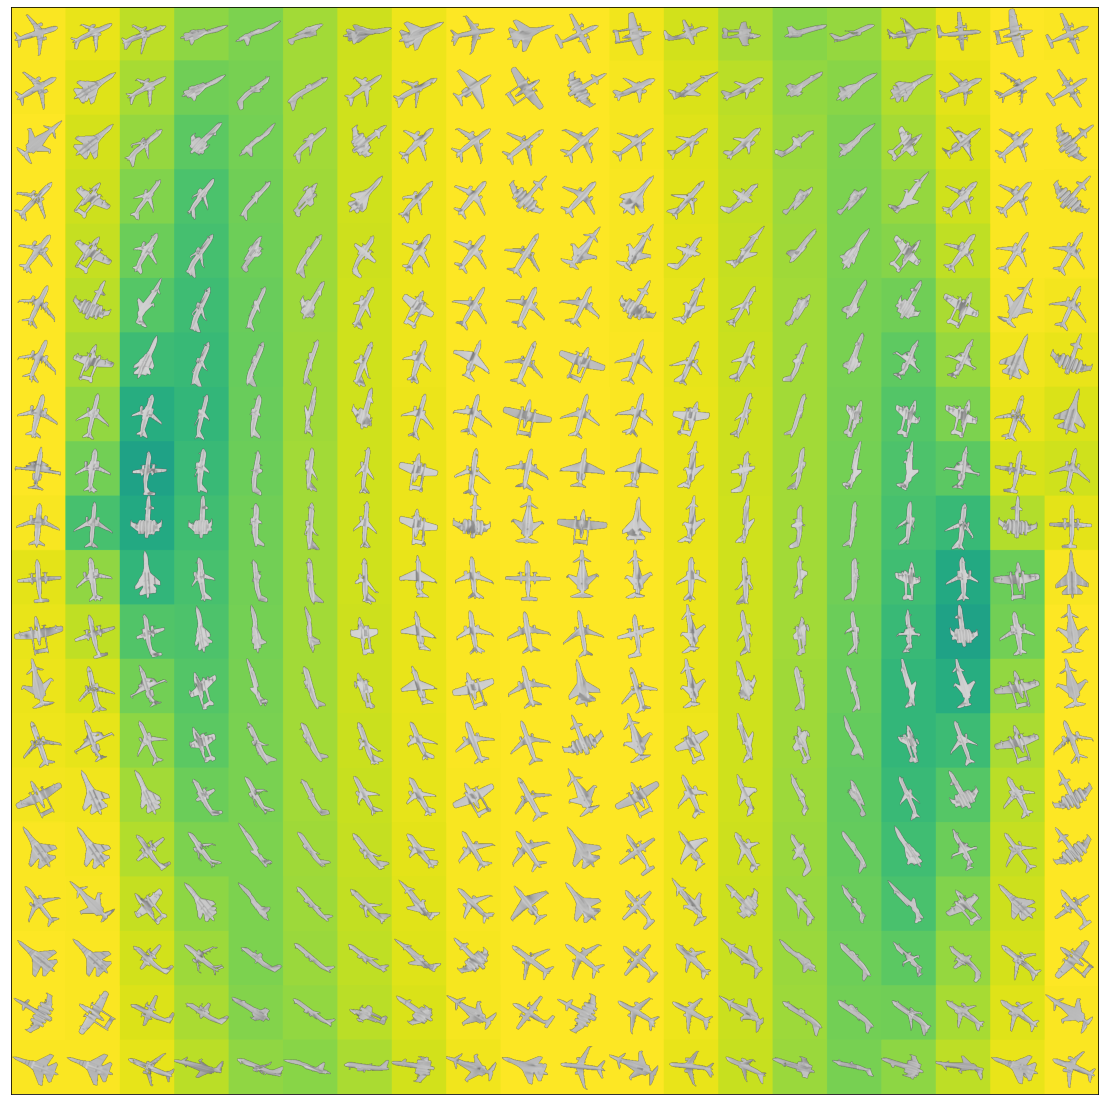

In [7]:
border_width = 55
border_size = 224 - (border_width * 2)
side_len = 20
_, heatmap, _, image = get_results(exp, side_len, True, img_boundary=border_width)
heatmap = np.load('canonical_x_unrestricted_heatmap.npy')[3]
# image_reshaped = (np.transpose(image, (2,0,3,1,4,5)).reshape((16, 16 * border_size, 16 * border_size, 4))/255)
image_reshaped = (np.transpose(image, (0,1,3,2,4,5)).reshape((side_len, side_len * border_size, side_len * border_size, 4))/255)
image_reshaped[...,3] = image_reshaped[...,0] > (100 / 255)
# expanded_heatmap = np.moveaxis(np.broadcast_to(heatmap[:,np.newaxis,:,np.newaxis], (16, border_size, 16, border_size, 16)).reshape((16 * border_size, 16 * border_size, 16)), 2, 0)
expanded_heatmap = np.broadcast_to(heatmap[:,:,np.newaxis,:,np.newaxis], (side_len, side_len, border_size, side_len, border_size)).reshape((side_len, side_len * border_size, side_len * border_size))
for i in tqdm.tqdm(range(side_len)):
    plt.close('all')
    fig, axes = plt.subplots(1, figsize=(20,20))
    axes.imshow(expanded_heatmap[i], norm=plt.Normalize(vmin=0, vmax=1))
    axes.imshow(image_reshaped[i])
    axes.set_xticks([])
    axes.set_yticks([])
    directory = f'/home/avic/Rotation-Generalization/xEf2'
    os.makedirs(directory, exist_ok=True)
    plt.savefig(os.path.join(directory,f'plane{i}.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [18]:
num_cubelets = 20
unrestricted_axis = 0
hole = False

dim0s, dim1s, dim2s = get_heatmap_cell_ranges(num_cubelets)

final_dim = dim2s if unrestricted_axis == 2 else dim1s if unrestricted_axis == 1 else dim0s
center_points = np.array([[0,0],[-0.2,-0.2],[-0.2,0.2],[0.2,-0.2],[0.2,0.2]])
hole_points = np.array([[-1.55,0],[-1.75,-0.2],[-1.75,0.2],[-1.25,-0.2],[-1.25,0.2]])
if hole == 0:
    v_1_combinations = center_points
elif hole == 1:
    v_1_combinations = hole_points
elif hole == 2:
    v_1_combinations = np.vstack((center_points, hole_points))

bin_rotations = np.repeat(np.insert(v_1_combinations, unrestricted_axis, None, axis=1), len(final_dim), axis=0).reshape(v_1_combinations.shape[0],num_cubelets,3)
bin_rotations[:,:,unrestricted_axis] = [range_mid(r[1]) for r in final_dim]
bin_rotations = bin_rotations.reshape(-1,3)

In [19]:
bin_rotations

array([[-2.98451302,  0.        ,  0.        ],
       [-2.67035376,  0.        ,  0.        ],
       [-2.35619449,  0.        ,  0.        ],
       [-2.04203522,  0.        ,  0.        ],
       [-1.72787596,  0.        ,  0.        ],
       [-1.41371669,  0.        ,  0.        ],
       [-1.09955743,  0.        ,  0.        ],
       [-0.78539816,  0.        ,  0.        ],
       [-0.4712389 ,  0.        ,  0.        ],
       [-0.15707963,  0.        ,  0.        ],
       [ 0.15707963,  0.        ,  0.        ],
       [ 0.4712389 ,  0.        ,  0.        ],
       [ 0.78539816,  0.        ,  0.        ],
       [ 1.09955743,  0.        ,  0.        ],
       [ 1.41371669,  0.        ,  0.        ],
       [ 1.72787596,  0.        ,  0.        ],
       [ 2.04203522,  0.        ,  0.        ],
       [ 2.35619449,  0.        ,  0.        ],
       [ 2.67035376,  0.        ,  0.        ],
       [ 2.98451302,  0.        ,  0.        ],
       [-2.98451302, -0.2       , -0.2  